In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 34kB/s 


In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.layers import *
from keras import optimizers
from matplotlib import pyplot as plt
from keras.models import load_model
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import*
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "kriesnabayupratama" # username from the json file
os.environ['KAGGLE_KEY'] = "9019e31300db9983603dfabcf7fb51e9" # key from the json file
!kaggle datasets download -d tongpython/cat-and-dog # api copied from kaggle

 92% 201M/218M [00:03<00:00, 39.4MB/s]
100% 218M/218M [00:03<00:00, 59.4MB/s]


In [0]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [0]:
im_size2 = (150,150,3)

train_gen=ImageDataGenerator(rescale=1.0/255)
test_gen=ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory("training_set/training_set",
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary'
                                             )
test_generator = test_gen.flow_from_directory("test_set/test_set/",
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary'
                                             )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


#Model Without Pretrain

In [0]:
from keras.layers import Dense
from keras import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=im_size2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#Model with VGG16

In [0]:
from keras.layers import Dense
from keras import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.applications.vgg16 import VGG16

model = VGG16(include_top=False, input_shape=im_size2)
for layer in model.layers:
  layer.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#Model Summary and Training

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [0]:
EPOCH = 10 #50
history=model.fit_generator(train_generator,
                           epochs=EPOCH,
                           steps_per_epoch=len(train_generator))

Epoch 1/10
251/251 [==============================] - 26s 104ms/step - loss: 0.6706 - accuracy: 0.5953
Epoch 2/10
251/251 [==============================] - 21s 83ms/step - loss: 0.5995 - accuracy: 0.6801
Epoch 3/10
251/251 [==============================] - 21s 83ms/step - loss: 0.5479 - accuracy: 0.7239
Epoch 4/10
251/251 [==============================] - 21s 83ms/step - loss: 0.5213 - accuracy: 0.7449
Epoch 5/10
251/251 [==============================] - 21s 83ms/step - loss: 0.4850 - accuracy: 0.7668
Epoch 6/10
251/251 [==============================] - 21s 83ms/step - loss: 0.4584 - accuracy: 0.7855
Epoch 7/10
251/251 [==============================] - 21s 83ms/step - loss: 0.4252 - accuracy: 0.8080
Epoch 8/10
251/251 [==============================] - 21s 83ms/step - loss: 0.3959 - accuracy: 0.8242
Epoch 9/10
251/251 [==============================] - 21s 83ms/step - loss: 0.3665 - accuracy: 0.8413
Epoch 10/10
251/251 [==============================] - 21s 83ms/step - loss: 0.33

In [0]:
model.save('cat_dogs.h5')

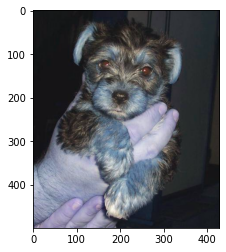

dogs


In [0]:
from google.colab import files
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

classes_dict=["cats","dogs"]
model = tf.keras.models.load_model('cat_dogs.h5')
path = "test_set/test_set/dogs/dog.4002.jpg"

img = cv2.imread(path)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
img.shape

classes= model.predict(img)

print(classes_dict[int(classes)])

In [0]:
import random
import os

evaluation_size = 256
im_shape = (evaluation_size,150,150,3)
eval_data = np.zeros(im_shape)
classes_dict=["cats","dogs"]
directories = ['training_set','test_set']
class_data = np.zeros(evaluation_size)

for i in range(evaluation_size):
  path = 'null'
  while(not os.path.exists(path)):
    choice = random.choice([0,1])
    temp_dir = directories[choice]
    choice = random.choice([0,1])
    temp_class = classes_dict[choice]
    num = random.randrange(2023) + 1
    if temp_dir == 'test_set':
      num += 4000
    path = temp_dir+'/'+temp_dir+'/'+temp_class+'/'+temp_class.replace('s','')+'.'+str(num)+'.jpg'
  img = cv2.imread(path)
  img = cv2.resize(img,(150,150))
  eval_data[i] = img.copy()
  class_data[i] = int(choice)

score = model.evaluate(eval_data,class_data, verbose=0)
print("{}: {}".format(model.metrics_names[1], score[1]*100))


accuracy: 75.0
